
# GST Data Analysis Using Python
                             

Two Different datasets:
1. Firms: It provides a firm identifier (GSTIN) and an indicator on whether the firm has
been found to be bogus from past inspections results.
2. Transactions: It provides GSTINs of seller and purchaser, filing period (MMYYYY) of
when the transaction was reported, invoice number, invoice date, quantity of
items, rate of tax, amount of tax by type (integrated tax, central tax, state tax,
cess).                            
                                               

# Section 1 - Data cleaning and merging

__________________________________________________________________________________________________________________

# 1. Import Transactions data into a pandas dataframe.

In [1]:
# importing libraries 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
d1=pd.read_csv("DATA_FIRMS.csv")
d2=pd.read_csv("DATA_TRANSACTIONS.csv")

In [3]:
#check type of data
print(type(d1,),type(d2))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [4]:
#View DataFrames
print("\nData_firms")
display(d1.head())
print("\nData_Transactions")
display(d2.head())
display(d2.tail())
display(d2['FILING_PERIOD'])


Data_firms


,GSTIN,IsBogus
0,0010215452,0.0
1,0038162EB9,0.0
2,004F894AEC,0.0
3,005A8D5BC6,0.0
4,007011E20F,0.0



Data_Transactions


,SELLER_GSTIN,PURCHASER_GSTIN,FILING_PERIOD,INVOICE_NUM,INVOICE_DATE,QUANTITY,TAXABLE_AMOUNT,TAX_RATE,CGST,SGST,IGST,CESS
0,80E18AC42B,325EDDD715,NaN,9140389879,2018-03-02,2,2601847.17,12,0.00,0.00,312221.66,0.0
1,776BBCB820,262EA86704,NaN,HR6616004285,2018-03-17,1,916689.15,18,NaN,NaN,165004.05,NaN
2,5A4FC8F226,AA67FDC3A6,NaN,04B045/19268,2018-03-05,1,41457.97,5,NaN,NaN,2072.90,5796.0
3,E7A5A47B46,37626EC80E,NaN,3150,2018-01-16,1,39873.45,28,5582.28,5582.28,NaN,0.0
4,6920AA6331,36DB0ABC9A,NaN,RICE-343,2018-03-10,1,771169.00,0,0.00,0.00,NaN,0.0


,SELLER_GSTIN,PURCHASER_GSTIN,FILING_PERIOD,INVOICE_NUM,INVOICE_DATE,QUANTITY,TAXABLE_AMOUNT,TAX_RATE,CGST,SGST,IGST,CESS
20095,5DA0527958,294205D6E0,32018.0,V171806235,2018-03-11,2,4643.00,18,NaN,NaN,835.74,0.0
20096,FAB06B8D5F,C221EEA66C,32018.0,DEL2519/17-18,2018-04-01,1801,3616.50,18,NaN,NaN,650.97,0.0
20097,A7215054CB,FCF98133EB,32018.0,G6943,2018-03-29,1,36800.00,18,0.00,0.00,6624.00,0.0
20098,1480269030,0F121D3705,32018.0,004260006951,2018-03-26,2,126725.10,28,0.00,0.00,35483.03,0.0
20099,86DFEB0A3F,3CFC218C41,32018.0,PB1100054841,2018-03-26,501,682802.88,5,17070.07,17070.07,NaN,0.0


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
20095    32018.0
20096    32018.0
20097    32018.0
20098    32018.0
20099    32018.0
Name: FILING_PERIOD, Length: 20100, dtype: float64

In [5]:
#View shape of DataFrames
print("Data_firms")
display(d1.shape)
print("Data_Transactions")
display(d2.shape)

Data_firms


(3131, 2)

Data_Transactions


(20100, 12)

In [6]:
#Describe the DataFrames
print("Data_firms")
display(d1.describe())
print("_________________________________________________________________________")
print("Data_Transactions")
display(d2.describe())

Data_firms


,IsBogus
count,3123.000000
mean,0.097663
std,0.296905
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


_________________________________________________________________________
Data_Transactions


,FILING_PERIOD,QUANTITY,TAXABLE_AMOUNT,TAX_RATE,CGST,SGST,IGST,CESS
count,20085.000000,20100.000000,2.010000e+04,20100.000000,1.321400e+04,1.321400e+04,1.304000e+04,1.599700e+04
mean,20130.521782,496.184279,5.253510e+05,16.797164,6.447210e+03,6.447210e+03,6.848852e+04,3.629857e+03
std,8336.987616,812.146543,2.362902e+06,7.708396,7.205206e+04,7.205206e+04,2.955450e+05,8.930419e+04
min,12018.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,12018.000000,1.000000,5.093602e+03,12.000000,0.000000e+00,0.000000e+00,1.061880e+03,0.000000e+00
50%,22018.000000,1.000000,4.527900e+04,18.000000,1.525500e+01,1.525500e+01,1.341817e+04,0.000000e+00
75%,32018.000000,1201.000000,2.690400e+05,18.000000,8.709700e+02,8.709700e+02,4.568367e+04,0.000000e+00
max,32018.000000,2801.000000,1.295597e+08,28.000000,4.866519e+06,4.866519e+06,2.332075e+07,4.750432e+06


# 2. Data cleaning and standardization: Are there any data quality issues with the different variables in the data-set (e.g. missing values)?


In [7]:
#Check Na values in d1
d1.isnull().sum().sum()

8

In [8]:
#Calculate the Total no.of Na's
print(d1.isnull().sum())

GSTIN      0
IsBogus    8
dtype: int64


In [9]:
#Replace the Na values into 0's
d1['IsBogus'] = d1['IsBogus'].fillna(0)

In [10]:
#Recheck the Na values in d1
print(d1.isnull().sum())

GSTIN      0
IsBogus    0
dtype: int64


In [11]:
#Check Na values in d2
d2.isnull().sum().sum()

24970

In [12]:
#Calculate the Total no.of Na's
print(d2.isnull().sum())

SELLER_GSTIN          0
PURCHASER_GSTIN      10
FILING_PERIOD        15
INVOICE_NUM           0
INVOICE_DATE         10
QUANTITY              0
TAXABLE_AMOUNT        0
TAX_RATE              0
CGST               6886
SGST               6886
IGST               7060
CESS               4103
dtype: int64


In [13]:
#Replace the Na values into 0's
d2['CGST'] = d2['CGST'].fillna(0)
d2['SGST'] = d2['SGST'].fillna(0)
d2['IGST'] = d2['IGST'].fillna(0)
d2['CESS'] = d2['CESS'].fillna(0)
d2['FILING_PERIOD'] = d2['FILING_PERIOD'].fillna(method='bfill')

In [14]:
#Recheck the Na values in d2
print(d2.isnull().sum())

SELLER_GSTIN        0
PURCHASER_GSTIN    10
FILING_PERIOD       0
INVOICE_NUM         0
INVOICE_DATE       10
QUANTITY            0
TAXABLE_AMOUNT      0
TAX_RATE            0
CGST                0
SGST                0
IGST                0
CESS                0
dtype: int64


# 3. Merge Firms data with the imported Transactions data.

In [15]:
#Merge the two different DataFrames as a df
df = pd.concat([d1, d2], axis=1, join='inner')
display(df.head(100))

,GSTIN,IsBogus,SELLER_GSTIN,PURCHASER_GSTIN,FILING_PERIOD,INVOICE_NUM,INVOICE_DATE,QUANTITY,TAXABLE_AMOUNT,TAX_RATE,CGST,SGST,IGST,CESS
0,0010215452,0.0,80E18AC42B,325EDDD715,12018.0,9140389879,2018-03-02,2,2601847.17,12,0.00,0.00,312221.66,0.0
1,0038162EB9,0.0,776BBCB820,262EA86704,12018.0,HR6616004285,2018-03-17,1,916689.15,18,0.00,0.00,165004.05,0.0
2,004F894AEC,0.0,5A4FC8F226,AA67FDC3A6,12018.0,04B045/19268,2018-03-05,1,41457.97,5,0.00,0.00,2072.90,5796.0
3,005A8D5BC6,0.0,E7A5A47B46,37626EC80E,12018.0,3150,2018-01-16,1,39873.45,28,5582.28,5582.28,0.00,0.0
4,007011E20F,0.0,6920AA6331,36DB0ABC9A,12018.0,RICE-343,2018-03-10,1,771169.00,0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,07DF9A0FE8,0.0,C44FFF7C7A,398C7082EB,12018.0,IN0001115329,2018-01-22,1,75504.00,12,0.00,0.00,9060.48,0.0
96,07EE2915A6,0.0,C1C058DFB2,4954D8982D,12018.0,QACA1718/05071,2018-01-05,1801,5000.00,18,0.00,0.00,900.00,0.0
97,080ED1ADC2,0.0,F4E518B376,410127754A,12018.0,17470,2018-01-10,1,3125.00,18,281.25,281.25,0.00,0.0
98,083B47E7EF,0.0,0F08B6DF08,E306607037,12018.0,2118702230004864,2018-01-17,1,123630.19,28,0.00,0.00,34616.45,0.0


# 4. Observe that in any given transaction, only one of IGST and CGST is non-zero. Why might that be?

# Answer:
   I can't understand what you are exactly trying to say in assessment queries, But my opinion is there are "NO" non-zero values in this dataset that you have given. Before and After the datasheet merged you can see below what I tried to show the outcome of your question.

# Before Merge

In [16]:
#Count the NON-ZERO data's in IGST & CGST
count_IGST = (d2['IGST'] != 0).sum()
count_CGST = (d2['CGST'] != 0).sum()
print('count of NON-ZERO IGST is ',count_IGST,'/////',
      'count of NON-ZERO CGST is ',count_CGST)

count of NON-ZERO IGST is  11792 ///// count of NON-ZERO CGST is  7218


In [17]:
#Total no of NON-ZERO's
11792+7218

19010

# After Merge

In [18]:
#Count the NON-ZERO data's in IGST & CGST
non_zero= df
all_non_zero = non_zero.eval("all_non_zero = (IGST!=0)&(CGST!=0)").query("all_non_zero==False")
display(all_non_zero)

,GSTIN,IsBogus,SELLER_GSTIN,PURCHASER_GSTIN,FILING_PERIOD,INVOICE_NUM,INVOICE_DATE,QUANTITY,TAXABLE_AMOUNT,TAX_RATE,CGST,SGST,IGST,CESS,all_non_zero
0,0010215452,0.0,80E18AC42B,325EDDD715,12018.0,9140389879,2018-03-02,2,2601847.17,12,0.00,0.00,312221.66,0.0,False
1,0038162EB9,0.0,776BBCB820,262EA86704,12018.0,HR6616004285,2018-03-17,1,916689.15,18,0.00,0.00,165004.05,0.0,False
2,004F894AEC,0.0,5A4FC8F226,AA67FDC3A6,12018.0,04B045/19268,2018-03-05,1,41457.97,5,0.00,0.00,2072.90,5796.0,False
3,005A8D5BC6,0.0,E7A5A47B46,37626EC80E,12018.0,3150,2018-01-16,1,39873.45,28,5582.28,5582.28,0.00,0.0,False
4,007011E20F,0.0,6920AA6331,36DB0ABC9A,12018.0,RICE-343,2018-03-10,1,771169.00,0,0.00,0.00,0.00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,FFBA1FAA42,0.0,5A4FC8F226,FC5D618E2E,12018.0,D17G18SC220167,2018-01-25,1801,80000.00,18,0.00,0.00,14400.00,0.0,False
3127,FFC08A9BD1,0.0,0F08B6DF08,41074F3B58,12018.0,2118704230000957,2018-01-25,1,26349.63,28,0.00,0.00,7377.90,0.0,False
3128,FFC97B6D56,0.0,C15EA8D5A2,FAB06B8D5F,12018.0,826071347,2018-01-03,1801,12000.00,18,1080.00,1080.00,0.00,0.0,False
3129,FFCCB78B66,0.0,62CD3BF990,A99F0E58FF,12018.0,3706034433,2018-01-12,1,95687.80,18,0.00,0.00,17223.80,0.0,False


In [19]:
#Total no of NON-ZERO's
number_non_zero_true= (all_non_zero["all_non_zero"]!=True).count()
print(number_non_zero_true)

3131


# 5. Note your responses to the following questions in your ipython notebook and show calculations wherever applicable:


__________________________________________________________________________________________________________________

# ○ How many different tax rates are present in the transactions data?

In [20]:
#Create a variable for TAX_RATE column to find different tax rate
Dif_Tax_Rates = df['TAX_RATE']
display(Dif_Tax_Rates)

0       12
1       18
2        5
3       28
4        0
        ..
3126    18
3127    28
3128    18
3129    18
3130     5
Name: TAX_RATE, Length: 3131, dtype: int64

In [21]:
#Use Counter function to find different types of tax rates and total count of each and every tax rates.
from collections import Counter
res = Counter(Dif_Tax_Rates)

display(res)

Counter({12: 365, 18: 1767, 5: 322, 28: 558, 0: 117, 3: 2})

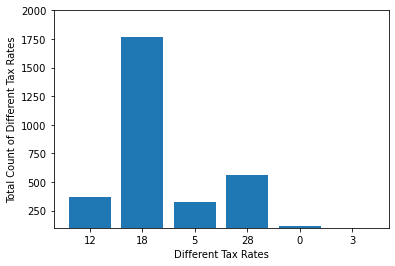

In [22]:
#Plot for different types of tax rates and total count of each and every tax rates.
names = list(res.keys())
values = list(res.values())
plt.bar(range(len(res)), values, tick_label=names)
plt.ylim(100,2000)
plt.xlabel('Different Tax Rates')
plt.ylabel('Total Count of Different Tax Rates')
plt.show()

1) There are 6 Different types of Tax Rates(DTR) in this data.

2) And Total Counts of Different Tax Rates(TCDTR).

           --------------
           ! DTR ! TCDTR!   Highest Rate of Tax is 18%
           !-----!------!   
           ! 12  ! 365  !   Lowest Rate of Tax is 3%
           ! 18  ! 1767 !
           !  5  ! 322  !
           ! 28  ! 558  !
           !  0  ! 117  !
           !  3  ! 2    !
           --------------

# ○ What is the average taxable value across all transactions?

In [23]:
#Create a variable for taxable value across all transactions.
Tax_Values = df[['CGST','SGST','IGST','CESS']]
display(Tax_Values)

,CGST,SGST,IGST,CESS
0,0.00,0.00,312221.66,0.0
1,0.00,0.00,165004.05,0.0
2,0.00,0.00,2072.90,5796.0
3,5582.28,5582.28,0.00,0.0
4,0.00,0.00,0.00,0.0
...,...,...,...,...
3126,0.00,0.00,14400.00,0.0
3127,0.00,0.00,7377.90,0.0
3128,1080.00,1080.00,0.00,0.0
3129,0.00,0.00,17223.80,0.0


In [24]:
#Find the average for all taxable value and all transactions
Tax_Values_Average = Tax_Values.mean()
print("Average by columns:\n\n",Tax_Values_Average)

Average by columns:

 CGST     5248.231559
SGST     5248.231559
IGST    48645.866305
CESS       86.259339
dtype: float64


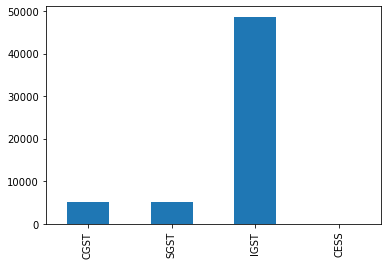

In [25]:
#plot for average of all taxable value and all transactions.
Tax_Values.mean().plot(kind='bar');

In [26]:
#Overall taxable value average.
tva=Tax_Values_Average.mean()
tvar = round(tva)
print("Overall Taxable Values Average is\n",tvar)

Overall Taxable Values Average is
 14807


# ○ What is the total tax collection for the filing period?

In [27]:
# In this FILING_PERIOD column na values are fill with before date values using with fillna() function and bfill method.

tf = d2["FILING_PERIOD"]
tf = tf.fillna(method='bfill',limit=15)
print(tf.head(20))

0     12018.0
1     12018.0
2     12018.0
3     12018.0
4     12018.0
5     12018.0
6     12018.0
7     12018.0
8     12018.0
9     12018.0
10    12018.0
11    12018.0
12    12018.0
13    12018.0
14    12018.0
15    12018.0
16    12018.0
17    12018.0
18    12018.0
19    12018.0
Name: FILING_PERIOD, dtype: float64


In [28]:
#Create a variable for Total tax collection.
Total_Tax_Collection = pd.concat([tf, Tax_Values], axis=1, join='inner')
display(Total_Tax_Collection.head(100))

,FILING_PERIOD,CGST,SGST,IGST,CESS
0,12018.0,0.00,0.00,312221.66,0.0
1,12018.0,0.00,0.00,165004.05,0.0
2,12018.0,0.00,0.00,2072.90,5796.0
3,12018.0,5582.28,5582.28,0.00,0.0
4,12018.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...
95,12018.0,0.00,0.00,9060.48,0.0
96,12018.0,0.00,0.00,900.00,0.0
97,12018.0,281.25,281.25,0.00,0.0
98,12018.0,0.00,0.00,34616.45,0.0


In [29]:
#Check unique filing period
Total_Tax_Collection.FILING_PERIOD.unique()

array([12018.])

In [30]:
#Sum of all tax columns seperately.
CGST = Total_Tax_Collection.CGST.sum(axis = 0)
CGST = round(CGST)
SGST = Total_Tax_Collection.SGST.sum(axis = 0)
SGST = round(SGST)
IGST = Total_Tax_Collection.IGST.sum(axis = 0)
IGST = round(IGST)
CESS = Total_Tax_Collection.CESS.sum(axis = 0)
CESS = round(CESS)

In [31]:
#Print the total of all tax collections Seperately.
print("Total of CGST Collection is:",CGST)
print("\nTotal of SGST Collection is:",SGST)
print("\nTotal of IGST Collection is:",IGST)
print("\nTotal of CESS Collection is:",CESS)

Total of CGST Collection is: 16432213

Total of SGST Collection is: 16432213

Total of IGST Collection is: 152310207

Total of CESS Collection is: 270078


In [32]:
#Total tax collection for filing period in jan-2018.
Total = CGST + SGST + IGST + CESS
print("The Total tax collection for the filing period Jan-2018 is:",Total)

The Total tax collection for the filing period Jan-2018 is: 185444711


# ○ Export this table as a csv file and share it with your output.

In [33]:
#df.to_csv('file1.csv')

# ○ Which firm has reported the maximum amount in sales? What is the turnover for this firm?

In [34]:
#Create a Variable for taxable amount and tax's
maxi = df[["TAXABLE_AMOUNT","CGST","SGST","IGST","CESS"]]
display(maxi)

,TAXABLE_AMOUNT,CGST,SGST,IGST,CESS
0,2601847.17,0.00,0.00,312221.66,0.0
1,916689.15,0.00,0.00,165004.05,0.0
2,41457.97,0.00,0.00,2072.90,5796.0
3,39873.45,5582.28,5582.28,0.00,0.0
4,771169.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...
3126,80000.00,0.00,0.00,14400.00,0.0
3127,26349.63,0.00,0.00,7377.90,0.0
3128,12000.00,1080.00,1080.00,0.00,0.0
3129,95687.80,0.00,0.00,17223.80,0.0


In [35]:
#Add all tax colunms seperately and output should filed with new column "TURNOVER"
maxi_amount = maxi.assign(TURNOVER = maxi["CGST"] + maxi["SGST"] + maxi["IGST"] + maxi["CESS"])
maxi_amount=round(maxi_amount)
maxi_amount

,TAXABLE_AMOUNT,CGST,SGST,IGST,CESS,TURNOVER
0,2601847.0,0.0,0.0,312222.0,0.0,312222.0
1,916689.0,0.0,0.0,165004.0,0.0,165004.0
2,41458.0,0.0,0.0,2073.0,5796.0,7869.0
3,39873.0,5582.0,5582.0,0.0,0.0,11165.0
4,771169.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3126,80000.0,0.0,0.0,14400.0,0.0,14400.0
3127,26350.0,0.0,0.0,7378.0,0.0,7378.0
3128,12000.0,1080.0,1080.0,0.0,0.0,2160.0
3129,95688.0,0.0,0.0,17224.0,0.0,17224.0


In [36]:
#Create a Variable for Taxable amount and turnover.
maxi_firm = pd.concat([df["GSTIN"],maxi_amount[["TAXABLE_AMOUNT","TURNOVER"]]], axis=1, join='inner')
display(maxi_firm.head(100))

,GSTIN,TAXABLE_AMOUNT,TURNOVER
0,0010215452,2601847.0,312222.0
1,0038162EB9,916689.0,165004.0
2,004F894AEC,41458.0,7869.0
3,005A8D5BC6,39873.0,11165.0
4,007011E20F,771169.0,0.0
...,...,...,...
95,07DF9A0FE8,75504.0,9060.0
96,07EE2915A6,5000.0,900.0
97,080ED1ADC2,3125.0,562.0
98,083B47E7EF,123630.0,34616.0


In [37]:
#Total Taxable amount value
maxi_amount = maxi_firm["TAXABLE_AMOUNT"].max()
maxi_amount

35459156.0

In [45]:
#maximum taxable amount index
maxi_firm.index[maxi_firm["TAXABLE_AMOUNT"]==35459156.0].tolist()

[540]

In [39]:
#maximum taxable amount firm details
display("The Firm of Maximum amount in sale and Turnover is",maxi_firm.iloc[[540]])

'The Firm of Maximum amount in sale and Turnover is'

,GSTIN,TAXABLE_AMOUNT,TURNOVER
540,2C55402F83,35459156.0,6382648.0


# ○ What is the average number of unique trading partners for a firm?

In [40]:
#uniquw trading partners
print("The unique trading partners of firms are: ",maxi_firm["GSTIN"].nunique())

The unique trading partners of firms are:  3108


# ○ How many firms have not paid any taxes?

In [41]:
#total number of firms for not paid any taxes.
def condition(x):
    return x==0

lst = maxi_firm["TURNOVER"]
print("The Total Number Of firms, Who have not paid any taxes is: ",sum(condition(x) for x in lst))


The Total Number Of firms, Who have not paid any taxes is:  120


# Section 2 - Data visualization

## 6. Visualization: Create 3 simple clearly-labeled separate graphs to compare
    
    business activity of legitimate and bogus firms using turnover and any 2 other variables created in Q6. Points will be provided for clarity, labeling and explainability of the graphs.

In [42]:
#Total no of fraud and valid transaction.
print('Fraud Cases :{}'.format(len(df[df['IsBogus'] == 1])))
print('Valid Transactions:{}'.format(len(df[df['IsBogus'] == 0])))

Fraud Cases :305
Valid Transactions:2826


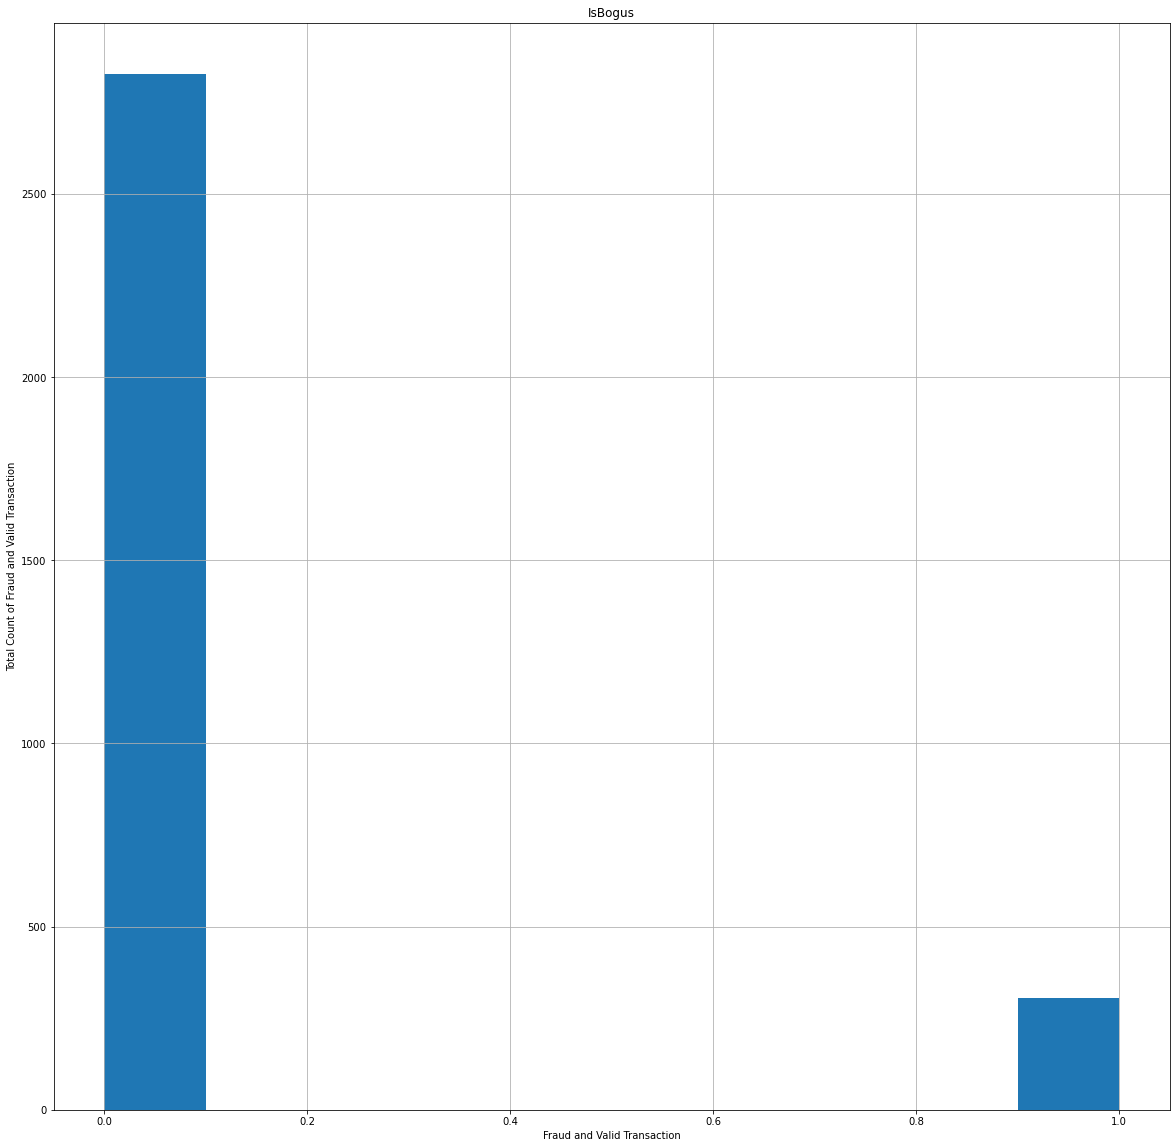

In [43]:
#plot for fraud and valid transaction
df.hist(column="IsBogus",figsize=(20,20))
plt.xlabel('Fraud and Valid Transaction')
plt.ylabel('Total Count of Fraud and Valid Transaction')
plt.show()